### Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy

Полученные значения должны быть равны.

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.


In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
print(zp, ks, sep='\n')

[ 35  45 190 200  40  70  54 150 120 110]
[401 574 874 919 459 739 653 902 746 832]


In [3]:
mu1 = sum(zp) / len(zp) # Находим среднее значение (мат. ожидание) з/п
mu1, (mu1 == np.mean(zp)) # и проверяем

(101.4, True)

In [4]:
mu2 = sum(ks) / len(ks) # находим мат.ожидание по кредитному рейтингу
mu2, (mu2 == np.mean(ks)) # и проверям/

(709.9, True)

In [5]:
multip = zp*ks # Перемножаем два списка по-элементно
multip

array([ 14035,  25830, 166060, 183800,  18360,  51730,  35262, 135300,
        89520,  91520])

In [6]:
mu_mult = sum(multip) / len(multip) # находим мат. ожидание списка-произведения
mu_mult, (mu_mult == np.mean(multip)) # и проверяем

(81141.7, True)

In [7]:
covar = mu_mult - mu1 * mu2 # находим смещенную ковариацию (хотя зачем?)
covar

9157.839999999997

In [8]:
covar_auto = np.cov(zp, ks, ddof=0) # смещенная ковариация
covar_auto

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [9]:
print(f"Проверим, что найденная вручную смещенная ковариация верна: {round(covar, 2) == round(covar_auto[0][1], 2)}")

Проверим, что найденная вручную смещенная ковариация верна: True


#### Теперь найдем несмещенную ковариацию:

In [10]:
zp_diff = list(map(lambda m: m-mu1, zp)) # составляем список из разностей (элемент - мат.ожидание)
zp_diff

[-66.4,
 -56.400000000000006,
 88.6,
 98.6,
 -61.400000000000006,
 -31.400000000000006,
 -47.400000000000006,
 48.599999999999994,
 18.599999999999994,
 8.599999999999994]

In [11]:
ks_diff = list(map(lambda n: n-mu2, ks))
ks_diff

[-308.9,
 -135.89999999999998,
 164.10000000000002,
 209.10000000000002,
 -250.89999999999998,
 29.100000000000023,
 -56.89999999999998,
 192.10000000000002,
 36.10000000000002,
 122.10000000000002]

In [12]:
mult_diff = [zp_diff[i] * ks_diff[i] for i in range(len(zp))] # составляем список произведений разностей
mult_diff

[20510.96,
 7664.759999999999,
 14539.26,
 20617.260000000002,
 15405.26,
 -913.7400000000009,
 2697.059999999999,
 9336.06,
 671.4600000000003,
 1050.0599999999995]

In [13]:
covar_1 = (1/(len(zp) - 1))*sum(mult_diff) # несмещенная ковариация
covar_1

10175.377777777776

In [14]:
covar_auto_1 = np.cov(zp, ks, ddof=1)
covar_auto_1

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [15]:
print(f"Проверим, что найденная вручную несмещенная ковариация верна: {round(covar_1, 2) == round(covar_auto_1[0][1], 2)}")

Проверим, что найденная вручную несмещенная ковариация верна: True


In [16]:
print(f"Ответ: несмещенная ковариация равна = {round(covar_1, 3)}")

Ответ: несмещенная ковариация равна = 10175.378


#### Найдем коэффициент корреляции Пирсона:

In [17]:
zp_diffsq = list(map(lambda k: k**2, zp_diff))
zp_diffsq

[4408.960000000001,
 3180.9600000000005,
 7849.959999999999,
 9721.96,
 3769.9600000000005,
 985.9600000000004,
 2246.7600000000007,
 2361.9599999999996,
 345.9599999999998,
 73.95999999999991]

In [18]:
var_zp = sum(zp_diffsq) / (len(zp) - 1) # работаем с несмещенными показателями
sd_zp = math.sqrt(var_zp)
var_zp, sd_zp

(3882.9333333333334, 62.31318747531162)

In [19]:
ks_diffsq = list(map(lambda k: k**2, ks_diff))
ks_diffsq

[95419.20999999999,
 18468.809999999994,
 26928.81000000001,
 43722.81000000001,
 62950.80999999999,
 846.8100000000013,
 3237.6099999999974,
 36902.41000000001,
 1303.2100000000016,
 14908.410000000005]

In [20]:
var_ks = sum(ks_diffsq) / (len(ks) - 1)
sd_ks = math.sqrt(var_ks)
var_ks, sd_ks

(33854.32222222223, 183.99544076477068)

In [21]:
corr_1 = covar_1 / (sd_zp * sd_ks)
corr_1

0.887490092073916

In [22]:
corr_auto_1 = np.corrcoef(zp, ks)
corr_auto_1

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [23]:
print(f"Проверим, что коэффициент корреляции, найденный вручную, верен: {round(corr_1, 2) == round(corr_auto_1[0][1], 2)}")

Проверим, что коэффициент корреляции, найденный вручную, верен: True


In [24]:
print(f"Ответ: коэффициент корреляции Пирсона = {round(corr_1, 3)}")

Ответ: коэффициент корреляции Пирсона = 0.887


### Задача 2
Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

### Решение
используем в данном случае распределение Стьюдента, так как дисперсия генеральной совокупности нам неизвестна, и размер выборки относительно мал.

In [25]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
alpha = 0.05
mu_iq = np.mean(iq)
sd_iq = np.std(iq, ddof=1)
len_iq = len(iq)

t_cr1 = stats.t.ppf(alpha/2, df=(len(iq) - 1))
t_cr2 = stats.t.ppf(1 - alpha/2, df=(len(iq) - 1))
t_cr1, t_cr2

(-2.262157162740992, 2.2621571627409915)

In [26]:
l_1 = mu_iq + t_cr1 * sd_iq/math.sqrt(len_iq)
u_1 = mu_iq + t_cr2 * sd_iq/math.sqrt(len_iq)
print(f"Доверительный интервал: ({round(l_1, 2)} : {round(u_1, 2)}) ")

Доверительный интервал: (110.56 : 125.64) 


In [27]:
u_1 - l_1

15.087832696825501

In [28]:
stats.t.interval(1 - alpha, df=len(iq)-1, loc=mu_iq, scale=stats.sem(iq)) # проверим

(110.55608365158724, 125.64391634841274)

Text(118.1, 0.018914984086593045, 'Доверительный\n интервал')

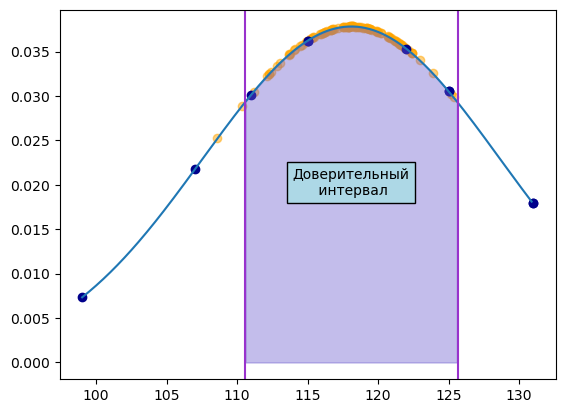

In [29]:
x_axis = np.arange(min(iq), max(iq), 0.1)
y_axis = stats.norm.pdf(x_axis, mu_iq, sd_iq)
plt.plot(x_axis, y_axis)
iq_normal = np.random.normal(loc=mu_iq, scale=stats.sem(iq), size=100) # случайные нормально распределенные значения с mu & sem
# так как значения разные, то нужно перезапускать эту часть, каждый раз немного по-разному
# но не более 5 значений из 100 выпадает, что подтверждает 95% доверительный интервал

plt.scatter(iq_normal, stats.norm.pdf(iq_normal, mu_iq, sd_iq), alpha=0.5, color='orange')
plt.scatter(iq, stats.norm.pdf(iq, mu_iq, sd_iq), color='darkblue')
plt.axvline(l_1, color='darkorchid')
plt.axvline(u_1, color='darkorchid')
plt.fill_between(x_axis, y_axis,
                where=(x_axis>l_1) & (x_axis < u_1),
                color='slateblue', alpha=0.4)
plt.annotate('Доверительный\n интервал', xy=(mu_iq, max(y_axis)/2), horizontalalignment='center',
            bbox=dict(facecolor="lightblue"))


In [30]:
print(f"Ответ: Доверительный интервал: ({round(l_1, 2)} : {round(u_1, 2)}) ")

Ответ: Доверительный интервал: (110.56 : 125.64) 


### Задача 3
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

### Решение
Будем использовать нормальное распределение, так как известна дисперсия генеральной совокупности.

In [31]:
alpha = 0.05
len_f = 27
var_f = 25
mu_f = 174.2
sd_f = math.sqrt(var_f)

z_cr1 = stats.norm.ppf(alpha/2)
z_cr2 = stats.norm.ppf(1 - alpha/2)
lf_3 = mu_f + z_cr1 * (math.sqrt(var_f / len_f))
uf_3 = mu_f + z_cr2 * (math.sqrt(var_f / len_f))
print(f"Доверительный интервал: ({round(lf_3, 2)} : {round(uf_3, 2)}) ")

Доверительный интервал: (172.31 : 176.09) 


С другой стороны, выборка слишком мала (встречала в литературе, что выборка должна быть >30). Попробуем использовать критерий Стьюдента:

In [32]:
tf_cr1 = stats.t.ppf(alpha/2, df=len_f - 1)
tf_cr2 = stats.t.ppf(1 - alpha/2, df=len_f - 1)
lf_3a = mu_f + tf_cr1 * (math.sqrt(var_f / len_f))
uf_3a = mu_f + tf_cr2 * (math.sqrt(var_f / len_f))
print(f"Доверительный интервал: ({round(lf_3a, 2)} : {round(uf_3a, 2)}) ")

Доверительный интервал: (172.22 : 176.18) 


Разница между нормальным и распределением Стьюдента незначительна. Продолжим работу с нормальным.

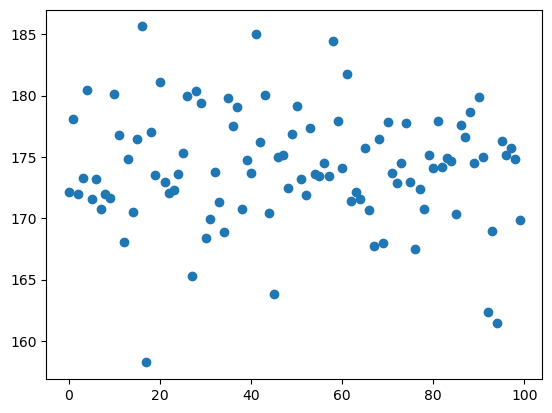

In [33]:
players = np.random.normal(loc=mu_f, scale=math.sqrt(var_f), size=100)
plt.scatter(range(len(players)), players)

In [34]:
stats.norm.interval(1 - alpha, loc=mu_f, scale=math.sqrt(var_f/len_f))

(172.3140237765397, 176.08597622346028)

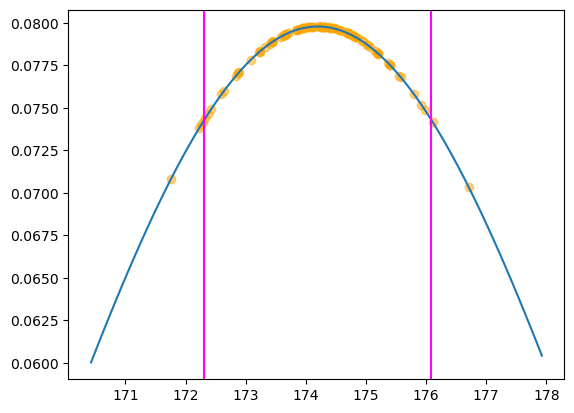

In [35]:
x_axis = np.arange(lf_3-(uf_3 - lf_3)/2, uf_3+(uf_3 - lf_3)/2, 0.1)
y_axis = stats.norm.pdf(x_axis, mu_f, math.sqrt(var_f))
plt.plot(x_axis, y_axis)
f_normal = np.random.normal(loc=mu_f, scale=math.sqrt(var_f/len_f), size=100)
plt.scatter(f_normal, stats.norm.pdf(f_normal, mu_f, sd_f), alpha=0.5, color='orange')
plt.axvline(lf_3, color='magenta')
plt.axvline(uf_3, color='magenta')


In [36]:
print(f"Ответ: Доверительный интервал: ({round(lf_3, 2)} : {round(uf_3, 2)}) ")

Ответ: Доверительный интервал: (172.31 : 176.09) 
